_This notebook was put together by [Keneth Garcia](https://stivengarcia7113.wixsite.com/kenethgarcia). Source and license info are on [GitHub](https://github.com/KenethGarcia/GRB_ML)._

# Swift Data Noise Reduction
The Neil Gehrels Swift Observatory presents analysis results for the Swift/BAT Gamma-Ray Burst (GRBs) on [this website](https://swift.gsfc.nasa.gov/results/batgrbcat/) (open access).

Swift/BAT data are **quite noisy**, and taking more cleaned light curves for t-SNE can refine its results. This notebook summarizes how to reduce noise from Swift Data using a non-parametric noise reduction technique called [FABADA](https://github.com/PabloMSanAla/fabada). Through this document, we are using the _python3_ implementations from the _ClassiPyGRB_ package. It is necessary to have an internet connection and a _Jupyter Notebook_/_Python 3_ compiler software.

First, we have to import the _SWIFT_ instance of _ClassiPyGRB_ to our notebook (and some other packages needed in this notebook):

In [2]:
from ClassiPyGRB import SWIFT
# Importing other packages needed
import os
import numpy as np
import pandas as pd

## Changing the Swift GRB binning
There are some cases in which we need to use different data resolutions and binning; handling these situations can be solved in this package by managing the _resolution_ $res$ argument.

Through **ClassiPyGRB**, you can change the _resolution_ variable to $2$, $8$, $16$, $64$, and $256$ ms respectively. Additionally, you can set $res=1000$ for 1s binning and $res=10000$ to use data with a signal-to-noise ratio higher than 5 or 10 s binning (10s data don't have uniform time spacing).

In **ClassiPyGRB**, you have a high level of saving data customization. You can set the following paths:
- $root\_path$ (str): Main path to save data/results from SWIFT. Unique mandatory path to ensure the functionality of SWIFT Class.
- $data\_path$ (str, optional): Path to save data from SWIFT. Defaults to Data folder inside root\_path.
- $original\_data\_path$ (str, optional): Path to save non-manipulated data from SWIFT. Defaults to Original\_Data folder inside data\_path.
- $noise\_data\_path$ (str, optional): Path to save noise-reduced data from SWIFT. Defaults to Noise\_Filtered\_Data folder inside data\_path.
- $results\_path$ (str, optional): Path to save non-manipulated data from SWIFT. Defaults to Results folder inside root\_path.

Moreover, in **ClassiPyGRB**, it is possible to customize the bands used from Swift/BAT data using the parameter `n_bands`. This parameter consists of an array of integers ranging from 1 to 5, where each integer represents a unique band from Swift. In order, 1 represents the 15-25 keV band, 2 represents the 25-50 keV band, 3 represents the 50-100 keV band, 4 represents the 100-350 keV band, and 5 represents the 15-350 keV band. Therefore, for example, by using $n\_bands=[2, 4]$ **ClassiPyGRB** understands that you would like to work with 25-50 keV and 100-350 keV bands. Setting `n_bands` appropriately can help you to improve the preprocessing, results of t-SNE, and custom plotting from Swift/BAT.

However, the most simple and easy implementation of **ClassiPyGRB** only uses $root\_path$ as a main folder and saves both data and results in this path:

In [72]:
swift = SWIFT(root_path=r'data', res=64, n_bands=[1,2,3,4,5])
print(f"Swift/BAT bands selected: {swift.bands_selected}")

Swift/BAT bands selected: ['Time(s)', '15-25keV', '25-50keV', '50-100keV', '100-350keV', '15-350keV']


Last, extract the GRB Names of Swift, and remove the GRBs with download errors, only if you already have downloaded data form Swift/BAT:

In [73]:
df = swift.summary_table()
GRB_names = df['GRBname'] # GRB Names total array
try:
    df = pd.read_table(os.path.join(swift.original_data_path, f"Errors_{swift.end}.txt"), sep='\t', comment='#', names=['GRB Name', 'Error'], header=None)
    GRB_errors = df['GRB Name']
except FileNotFoundError:
    pass
else:
    GRB_names = np.unique(GRB_names[~GRB_names.isin(GRB_errors)])
print(f'There are {len(GRB_names)} GRBs in the current working Swift/BAT dataset.')

There are 1587 GRBs in the current working Swift/BAT dataset.


**Note:** If you haven't downloaded the data yet, check the _BAT_Data_Download_ notebook. It is strongly recommended to download data before running this notebook, although the instances used here can work without any previously downloaded data, the time of execution can be highly affected if you do not have it.

## Fully Adaptive Bayesian Algorithm for Data Analysis - FABADA

Took from their [GitHub](https://github.com/PabloMSanAla/fabada):
_FABADA is a novel non-parametric noise reduction technique that arises from the point of view of Bayesian inference that iteratively evaluates possible smoothed models of the data, obtaining an estimation of the underlying signal that is statistically compatible with the noisy measurements. (...) **The only requisite of the input data is an estimation of its associated variance**._

As you can read, we need to estimate variance before implementing FABADA. To do this, we use a public method based on _[John Immerkær(1996)](https://www.semanticscholar.org/paper/Fast-Noise-Variance-Estimation-Immerk%C3%A6r/1da5c5819ae1d33a2a4acc57e16cb655374054e7)_; it consists of a simple function that takes one light curve band array as a 1 pixel gray-scaled image. To prevent disturbing estimation by the GRB itself, we use only the data outside $T_{100}$.

Let's reduce the noise of a specific GRB:

In [ ]:
# new GRBs not in package, comment out if fresh run

GRB_names = [
    'GRB231215A',
    'GRB231214A',
    'GRB231210B',# maybe
    'GRB231205B',
    'GRB231129A',
    'GRB231118A',
    'GRB231117A',
    'GRB231111A',
    'GRB231110A',
    'GRB231104A',
    'GRB231028A'
]


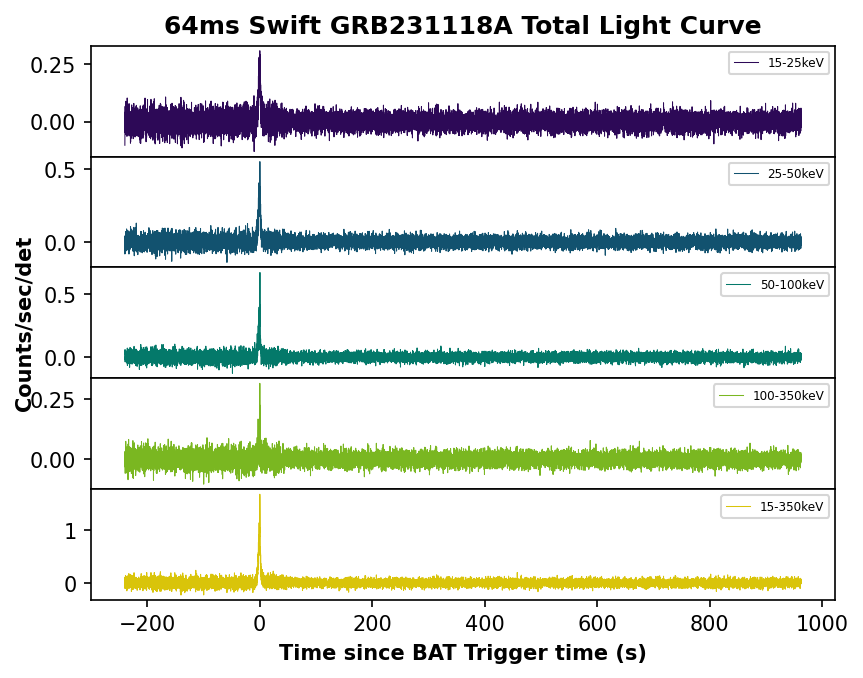

In [79]:
%matplotlib inline
name = 'GRB231118A'
ax = swift.plot_any_grb(name=name)

Through the `noise_reduction_fabada` function, we reduce the noise of any GRB in the dataset only by introducing its name:

In [80]:
df = swift.noise_reduction_fabada(name=name)
print(df)

       Time(s)  15-25keV  15-25Err  25-50keV  25-50Err  50-100keV  50-100Err   
0     -239.568  0.000756  0.031948 -0.009046  0.035081   0.008549   0.027302  \
1     -239.504  0.003514  0.030010 -0.009562  0.035881   0.008443   0.028349   
2     -239.440  0.003982  0.035186 -0.008570  0.033636   0.008488   0.025441   
3     -239.376  0.004098  0.033767 -0.008647  0.032315   0.008182   0.031976   
4     -239.312  0.004699  0.035500 -0.008782  0.039367   0.007478   0.025377   
...        ...       ...       ...       ...       ...        ...        ...   
18778  962.224  0.006852  0.022884  0.000857  0.023490  -0.000800   0.019528   
18779  962.288  0.006865  0.025798  0.000432  0.021906  -0.000509   0.021289   
18780  962.352  0.006674  0.021539  0.000131  0.023255  -0.000470   0.019074   
18781  962.416  0.006692  0.021784 -0.000261  0.027424  -0.000294   0.019209   
18782  962.480  0.006658  0.022545 -0.000463  0.024901  -0.000117   0.019166   

       100-350keV  100-350Err  15-350ke

Additionally, you can control the results of noise reduction by specifying the variance to use in the FABADA algorithm setting the `sigma` argument. It can receive a constant variance value or a list of variance values for each band. If you don't specify any value, the variance will be estimated using the RMS noise of an image.

Moreover, you can save the results of noise reduction in a table by setting the `save` argument to `True`. By default, the table will be saved in the `noise_data_path` folder with the name `{GRB Name}_{end}.h5`. You can change the path of saving by setting the `noise_data_path` argument in the `SWIFT` instance.

Let's plot the results of noise reduction using the `plot_any_grb` instance:

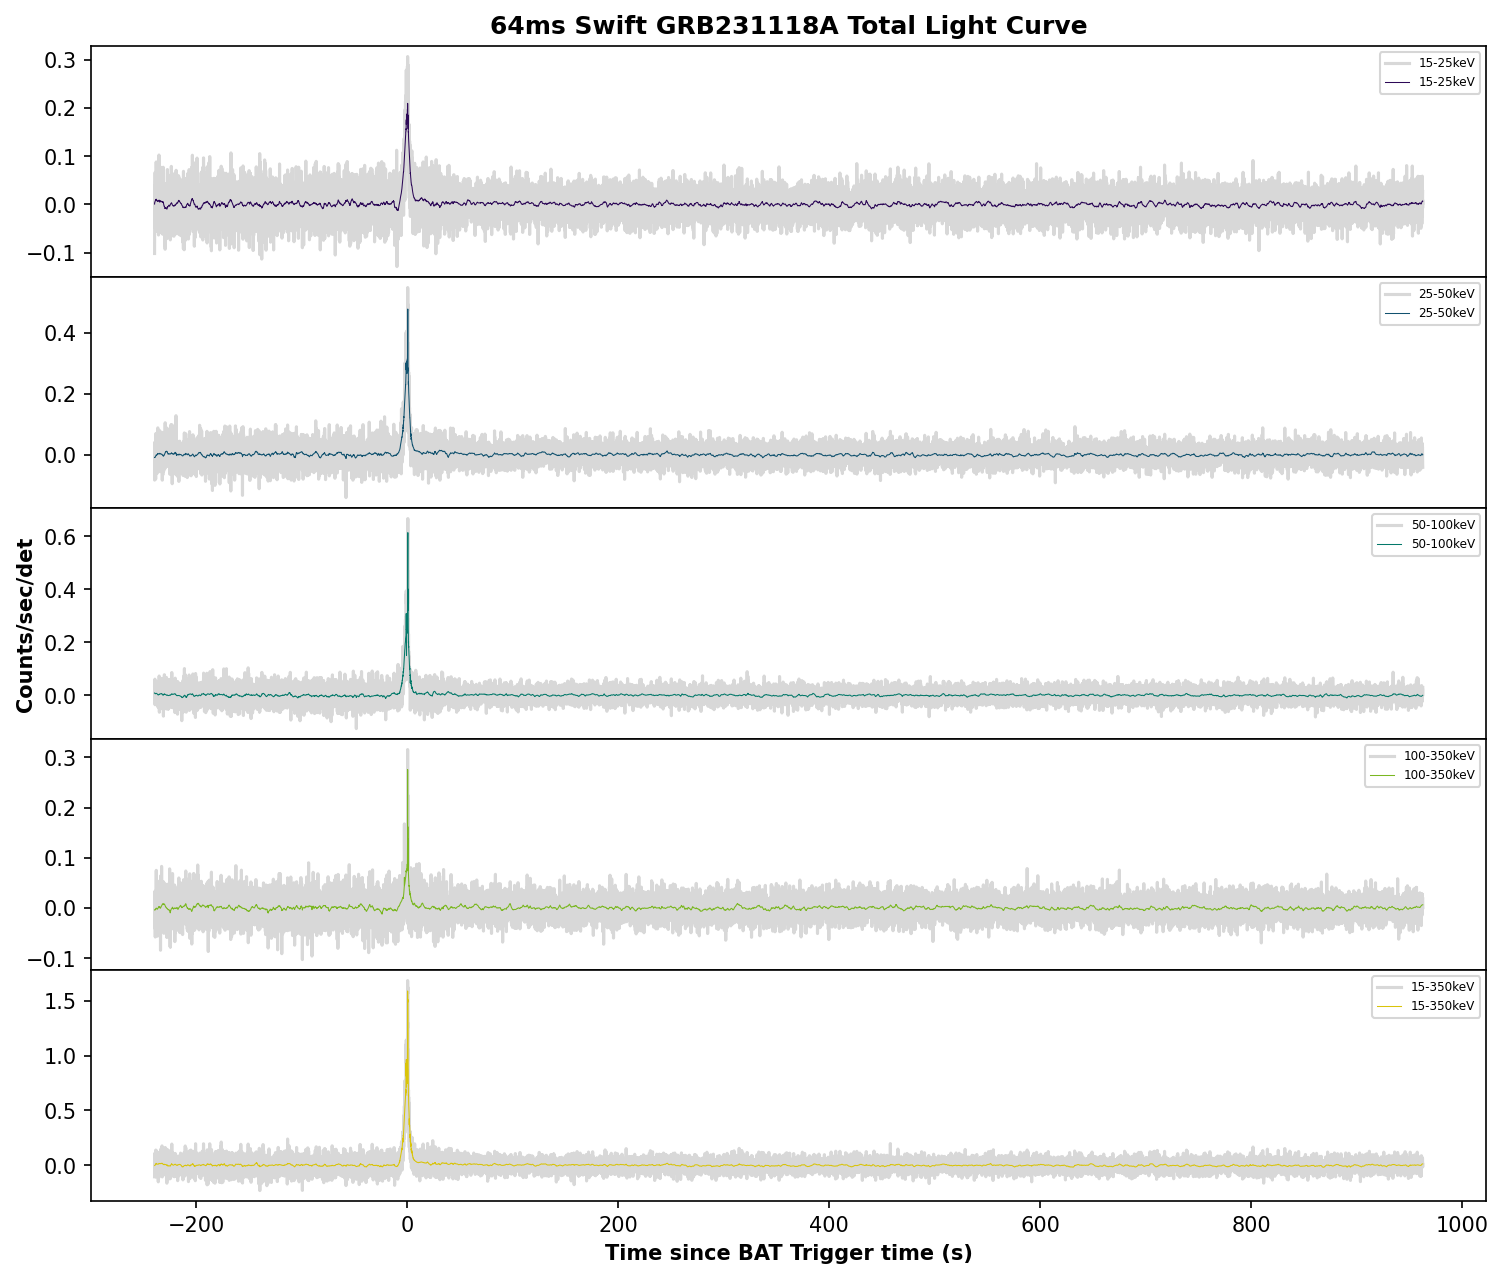

In [81]:
swift.noise_reduction_fabada(name=name, save_data=True)  # Save the results of noise reduction in disk
ax2 = swift.plot_any_grb(name=name, kind='Interpolated', legend=False, figsize=[12, 10], check_disk=True)  # Plot original data
# Change temporary the path where plot_any_grb method looks for data
old_path = swift.original_data_path
swift.original_data_path = swift.noise_data_path
ax2 = swift.plot_any_grb(name=name, legend=True, ax=ax2, check_disk=True)  # Force to read data from disk
swift.original_data_path = old_path

and inside $T_{100}$:

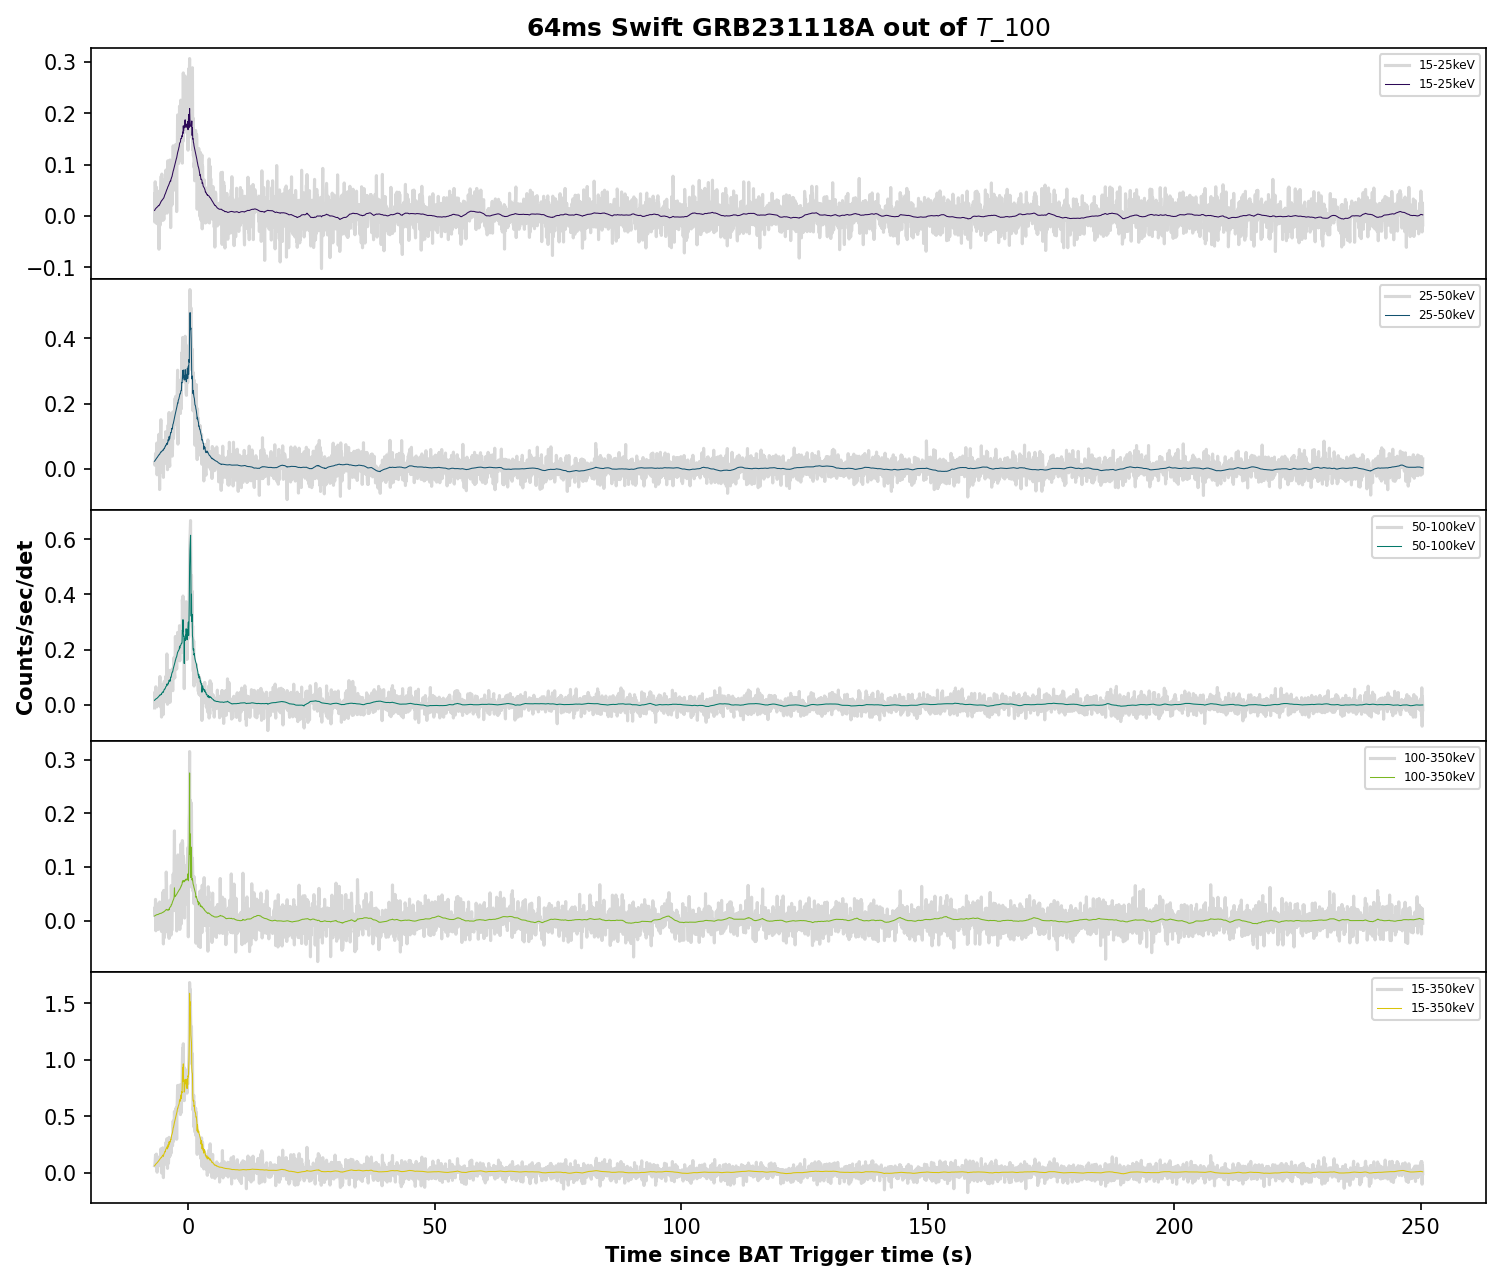

In [82]:
ax3 = swift.plot_any_grb(name=name, kind='Interpolated', legend=False, t=100, figsize=[12, 10], check_disk=True)  # Plot original data
# Change temporary the path where plot_any_grb method looks for data
old_path = swift.original_data_path
swift.original_data_path = swift.noise_data_path
ax3 = swift.plot_any_grb(name=name, legend=True, ax=ax3, t=100, check_disk=True)  # Force to read data from disk
swift.original_data_path = old_path

As you can see, the gray background represents the original data, and the colored lines are the noise-filtered results (the plot is saved automatically in the results' directory). In general, the noise reduction is satisfactory and reveals a problem: GRBs with low signal-to-noise ratios seem like only random noise. Check (for example) the GRB060203 results:

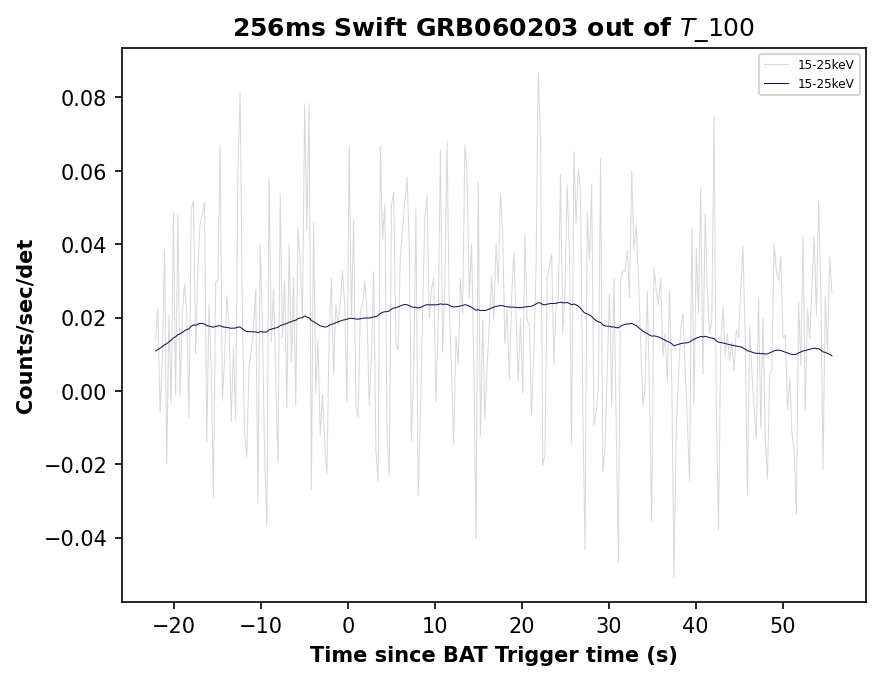

In [35]:
df2 = swift.noise_reduction_fabada(name='GRB060203', save_data=True)
ax4 = swift.plot_any_grb(name='GRB060203', kind='Interpolated', legend=False, t=100)
old_path = swift.original_data_path
swift.original_data_path = swift.noise_data_path
ax4 = swift.plot_any_grb(name='GRB060203', legend=True, ax=ax4, t=100, check_disk=True)
swift.original_data_path = old_path

Beyond this fact, we can parallelize the noise reduction using the `parallel_noise_reduction_fabada` instance (enable the `save_data` parameter to keep results in the data directory):

**Note:** This instance can take a while to finish, depending on the number of GRBs in the dataset.

In [59]:
# new GRBs not in package, comment out if fresh run

GRB_names = [
    'GRB231215A',
    'GRB231214A',
    'GRB231210B',
    'GRB231205B',
    'GRB231129A',
    'GRB231118A',
    'GRB231117A',
    'GRB231111A',
    'GRB231110A',
    'GRB231104A',
    'GRB231028A'
]


In [60]:
df_list = swift.parallel_noise_reduction_fabada(names=GRB_names, save_data=True)
del df_list, df, ax2, ax3, ax4, old_path

Noise reduction: 100%|█████████████████████████| 11/11 [00:35<00:00,  3.27s/GRB]


NameError: name 'ax2' is not defined

The errors in the noise-reducing process are saved in a table in the `noise_data_path` folder with the name `Errors_{end}.txt`. You can read it using the `pandas` library:

In [61]:
df_error = pd.read_table(os.path.join(swift.noise_data_path, f"Errors_{swift.end}.txt"), sep='\t', comment='#', names=['GRB Name', 'Error'], header=None)
GRB_errors = np.array(df_error['GRB Name'])
print(df_error)

Empty DataFrame
Columns: [GRB Name, Error]
Index: []


There are cases where **ClassiPyGRB** can't recover any data outside T_100, and therefore, it is not possible to estimate the RMS noise. **Those GRBs lacking data outside T_100 will be saved without any noise filter if `save_data` is enabled**. In this run, those GRBs are:

In [62]:
df_errors2 = df_error[df_error['Error'].isin(['No data outside T_100'])]
GRB_errors2 = np.asarray(df_errors2['GRB Name'])
print(GRB_errors2)

[]


If you want to use noise-reduced data to perform T-Distributed Stochastic Neighbor Embedding (t-SNE), you have to remove those GRBs from the dataset. Also, we strongly recommend removing two GRBs: GRB060510A and GRB131105A (at least for 64ms in July 2023 data). This is because they have non-zero data outside $T_{100}$, but inside $T_{100}$ have only zeros (check the [_BAT_Preprocess_](https://github.com/KenethGarcia/ClassiPyGRB/blob/8546f224e3b722a73440a1341270b271cbfdfeb5/docs/3.BAT_Preprocess.ipynb) notebook), Therefore, when `FABADA` is implemented in those GRBs, the zero data inside $T_{100}$ changes to non-zero values (all closes to zero, i.e., $1e-9$) and the `lc_limiter` instance does not flag these GRBs.

Those GRB errors from the dataset will be removed in the `parallel_lc_limiter` instance, so let's remove GRB060510A and GRB131105A:

In [63]:
fname = f'SWIFT_Noise_Reduced_data_{swift.res}res_{"".join(str(b) for b in swift.n_bands)}bands_DFT_True.npz'
prep_data_loaded = np.load(os.path.join(swift.results_path, fname))
prep_grb_names, prep_data = prep_data_loaded['names'], prep_data_loaded['data']
GRB_names = prep_grb_names.tolist() + GRB_names

In [64]:
GRB_names = np.setdiff1d(GRB_names, ['GRB060510A', 'GRB131105A'])
print(f'There are {len(GRB_names)} GRBs in the current working Swift/BAT dataset.')

There are 1456 GRBs in the current working Swift/BAT dataset.


## Pre-processing procedure
With the noise-filtered data, we need to pre-process it to use on t-SNE. The main idea is to change the _original_data_path_ to the noise filtered data path and follows the same methods from the [_3.BAT_Preprocess_](https://github.com/KenethGarcia/ClassiPyGRB/blob/8546f224e3b722a73440a1341270b271cbfdfeb5/docs/3.BAT_Preprocess.ipynb) notebook:

In [65]:
old_path = swift.original_data_path
swift.original_data_path = swift.noise_data_path
limited_data, GRB_names, errors = swift.parallel_lc_limiter(GRB_names)
print(errors)

LC limiting: 100%|█████████████████████████| 1456/1456 [00:27<00:00, 53.92GRB/s]


Empty DataFrame
Columns: [Names, t_start, t_end, Error]
Index: []


Normalizing data:

In [66]:
normalized_data = swift.parallel_lc_normalize(limited_data)  # Normalizing all light curves
del limited_data  # Delete unused variable

LC Normalizing: 100%|█████████████████████| 1456/1456 [00:07<00:00, 186.36GRB/s]


Zero-padding:

In [67]:
zero_padded_data = swift.parallel_zero_pad(normalized_data)
del normalized_data  # Delete unused variable

LC Zero-Padding: 100%|████████████████████| 1456/1456 [00:06<00:00, 217.98GRB/s]


Concatenating data:

In [68]:
concatenated_data = swift.parallel_concatenate(zero_padded_data)  # Concatenate data without DFT

Concatenating: 100%|██████████████████████| 1456/1456 [00:06<00:00, 217.15GRB/s]


Perform DFT:

In [69]:
pre_processing_data = swift.parallel_dft_spectrum(concatenated_data)

Performing DFT: 100%|█████████████████████| 1456/1456 [00:06<00:00, 217.93GRB/s]


In [70]:
pre_processing_data.shape

(1456, 2400)

Finally, save the results:

In [71]:
swift.save_results(f'SWIFT_Noise_Reduced_data_{swift.res}res_{"".join(str(b) for b in swift.n_bands)}bands_DFT_True.npz', names=GRB_names, data=pre_processing_data)  # Save Data with DFT
swift.save_results(f'SWIFT_Noise_Reduced_data_{swift.res}res_{"".join(str(b) for b in swift.n_bands)}bands_DFT_False.npz', names=GRB_names, data=concatenated_data)  # Save Data without DFT